In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from ntpath import join
from statistics import mean, median, variance
from scipy.signal import find_peaks
import sklearn as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import os

In [2]:
#set source kinect/python
source='kinect'

#pro klsifikaci kinect
#names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','ZF006_b_data','ZF007_b_data','ZM008_b_data','ZM009_b_data','ZF010_b_data','ZF011_b_data','ZM012_b_data','ZM013_b_data','ZM014_b_data','ZM015_b_data','ZM016_b_data','ZM017_b_data','ZF018_b_data','ZF019_b_data','ZF020_b_data','SM001_bal_data','SM003_bal_data','SM004_bal_data','SM004_bal_data','SM005_bal_data','SM008_bal_data', 'SM009_bal_data','SM012_bal_data','SF013_bal_data','SF014_bal_data','SF015_bal_data','SF016_bal_data','SF017_bal_data','SM030_bal_data','SF031_bal_data','SF031_bal_data','SM032_bal_data','SM033_bal_data','SM034_bal_data','SM035_bal_data']
names=['ZM001_b_data','ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','ZF006_b_data','ZF007_b_data','ZM008_b_data','ZM009_b_data','ZF010_b_data','ZF011_b_data','ZM012_b_data','ZM013_b_data','ZM014_b_data','ZM015_b_data','ZM016_b_data','ZM017_b_data','ZF018_b_data','ZF019_b_data','ZF020_b_data','SF006_bar_data','SF007_bar_data','SF010_bar_data','SF011_bar_data','SM020_bar_data','SM021_bar_data','SM022_bar_data','SM023_bar_data', 'SM024_bar_data','SM040_bar_data','SM041_bar_data','SF042_bar_data','SF043_bar_data','SF044_bar_data','SF045_bar_data','SF046_bar_data','SM047_bar_data','SM048_bar_data','SM049_bar_data']

#klasifikace python
#names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','SM001_bal_data','SM002_bal_data','SM003_bal_data','SM004_bal_data','SM005_bal_data']
#names=['ZM001_b_data','ZM002_b_data','ZM003_b_data','ZM004_b_data','ZM005_b_data','SM006_bar_data','SM008_bar_data','SM009_bar_data','SM010_bar_data']

#path = r'C:\Users\kuba8\Desktop\studium\Python_record\python_data\Only_selected'
#names = os.listdir(path)
#names=['SF035_bal_data.txt', 'SF036_bal_data.txt', 'SF037_bal_data.txt', 'SF038_bal_data.txt', 'SF039_bal_data.txt', 'SF040_bal_data.txt', 'SM001_bal_data.txt', 'SM002_bal_data.txt', 'SM003_bal_data.txt', 'SM004_bal_data.txt', 'SM005_bal_data.txt', 'SM030_bal_data.txt', 'SM031_bal_data.txt', 'SM032_bal_data.txt', 'SM033_bal_data.txt', 'SM034_bal_data.txt', 'SM041_bal_data.txt', 'SM042_bal_data.txt', 'SM043_bal_data.txt', 'SM044_bal_data.txt', 'ZF011_b_data.txt', 'ZF012_b_data.txt', 'ZF013_b_data.txt', 'ZF014_b_data.txt', 'ZF015_b_data.txt', 'ZF020_b_data.txt', 'ZM001_b_data.txt', 'ZM002_b_data.txt', 'ZM003_b_data.txt', 'ZM004_b_data.txt', 'ZM005_b_data.txt', 'ZM006_b_data.txt', 'ZM007_b_data.txt', 'ZM008_b_data.txt', 'ZM008_b_data.txt',  'ZM009_b_data.txt', 'ZM010_b_data.txt', 'ZM016_b_data.txt', 'ZM017_b_data.txt', 'ZM018_b_data.txt']
#names=['SF011_bar_data.txt', 'SF012_bar_data.txt', 'SF013_bar_data.txt', 'SF014_bar_data.txt', 'SF015_bar_data.txt', 'SF025_bar_data.txt', 'SM006_bar_data.txt', 'SM007_bar_data.txt', 'SM008_bar_data.txt', 'SM009_bar_data.txt', 'SM010_bar_data.txt', 'SM016_bar_data.txt', 'SM017_bar_data.txt', 'SM018_bar_data.txt', 'SM019_bar_data.txt', 'SM020_bar_data.txt', 'SM021_bar_data.txt', 'SM022_bar_data.txt', 'SM023_bar_data.txt', 'SM024_bar_data.txt', 'ZF011_b_data.txt', 'ZF012_b_data.txt', 'ZF013_b_data.txt', 'ZF014_b_data.txt', 'ZF015_b_data.txt', 'ZF020_b_data.txt', 'ZM001_b_data.txt', 'ZM002_b_data.txt', 'ZM003_b_data.txt', 'ZM004_b_data.txt', 'ZM005_b_data.txt', 'ZM006_b_data.txt', 'ZM007_b_data.txt', 'ZM008_b_data.txt', 'ZM008_b_data.txt', 'ZM009_b_data.txt', 'ZM010_b_data.txt', 'ZM016_b_data.txt', 'ZM017_b_data.txt', 'ZM018_b_data.txt']
if names[-1][6:9]=='bal':
    points=[3,4,5]
else:
    points=[0,1,2]

In [3]:
#function which select peaks in signal and set borders for next calculation
def select2(x,rel_hig, wid,dis,a,b,promin=0):

    #initial gues of promminence
    if promin==0:
        promin=(max(x[a:b])-mean(x[a:b]))*0.5

    #function for searching peaks
    peaks, properties = find_peaks(-x[a:b], prominence=promin, rel_height=rel_hig, width=wid, distance=dis)

    #repeat, if number of peaks is bigger than 6
    if len(peaks)>6:
        promin=promin+0.002/20
        peaks,properties=select2(x, rel_hig, wid,dis,a,b,promin)
    properties["prominences"], properties["widths"]

    #returns borders of peaks(properties) and order index of peaks
    return peaks, properties

In [4]:
#function for making signal without noise
def process(data,num,num2):
    #select specific points in signal
    peak1,prop1=select2(data[num],0.8,1,5.5,0,len(data))
    #widen area of peaks
    p=2
    x=np.array([])

    #make signal composed from exercises
    for j in range(0,len(peak1)):
        xpo=data[num2][round(prop1['left_ips'][j])-p:round(prop1['right_ips'][j])+p]
        x=np.append(x,xpo)
    return x

In [5]:
#make table of means and variances
dataset=pd.DataFrame([])  
for l,val in enumerate(points):
    for k in range(0,len(names)):
        #load data
        if source=='kinect':
            path=r'C:\Users\kuba8\MATLAB Drive\projekt oblicej\dataPython\Only_selected_points'#kinect
            start=1
        elif source=='python':
            path=r'C:\Users\kuba8\Desktop\studium\Python_record\python_data\Only_selected'#python
            start=0
        data=pd.read_csv(join(path,names[k]+'.txt'),sep=' ',header=None)
        data=data.transpose()
        
        #get specific area of peaks
        data=process(data,1,val)
        
        if l<start:
            value=mean(data)
        else:
            value=variance(data)#variance
        df = pd.DataFrame({'value':[value], 'label': names[k],'point_index': val,'status':names[k][0]})
        dataset=pd.concat([dataset,df], axis=0,ignore_index=True)

In [6]:
dataset

,value,label,point_index,status
0,8.249572e+01,ZM001_b_data,0,Z
1,8.249572e+01,ZM001_b_data,0,Z
2,8.209846e+01,ZM002_b_data,0,Z
3,8.155019e+01,ZM003_b_data,0,Z
4,8.246646e+01,ZM004_b_data,0,Z
...,...,...,...,...
115,4.819810e-07,SF045_bar_data,2,S
116,3.767410e-07,SF046_bar_data,2,S
117,2.016140e-06,SM047_bar_data,2,S
118,1.387130e-06,SM048_bar_data,2,S


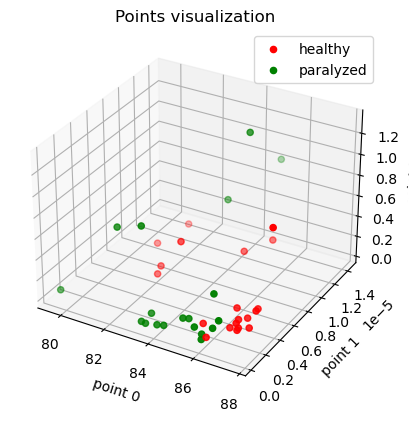

In [7]:
#%matplotlib widget
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.set_title("Points visualization")
ax.set_xlabel(f'point {points[0]}')
ax.set_ylabel(f'point {points[1]}')
ax.set_zlabel(f'point {points[2]}')
ax.scatter(dataset.query("status == 'Z' and point_index == @points[0]")['value'],dataset.query("status == 'Z' and point_index == @points[1]")['value'],dataset.query("status == 'Z' and point_index == @points[2]")['value'],color='red',label='healthy')
ax.scatter(dataset.query("status == 'S' and point_index == @points[0]")['value'],dataset.query("status == 'S' and point_index == @points[1]")['value'],dataset.query("status == 'S' and point_index == @points[2]")['value'],color='green',label='paralyzed')
ax.legend()

In [8]:
#make data ready for classifiers
y=np.array([])
for name in names:
    if name[0]=='Z':
        y=np.append(y,1)
    else:
        y=np.append(y,0)

In [9]:
x1 = pd.DataFrame({f'point {points[0]}':dataset.query("point_index == @points[0]")['value']},index=None).reset_index()
x2 = pd.DataFrame({f'point {points[1]}':dataset.query("point_index == @points[1]")['value']},index=None).reset_index()
x3 = pd.DataFrame({f'point {points[2]}':dataset.query("point_index == @points[2]")['value']},index=None).reset_index()

x=pd.DataFrame([x1[f'point {points[0]}'],x2[f'point {points[1]}'],x3[f'point {points[2]}']]).transpose()

In [10]:
x.head()

,point 0,point 1,point 2
0,82.495717,0.000008,0.000003
1,82.495717,0.000008,0.000003
2,82.098462,0.000010,0.000003
3,81.550192,0.000008,0.000002
4,82.466458,0.000005,0.000002


In [11]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes-do clanku vynechat
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

def plot_decision_boundary(model):
    a=0
    b=1
    x_min, x_max = X[:,1].min(), X[:,1].max()
    y_min, y_max = X[:,2].min(), X[:,2].max()
    
    xx, yy=np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = predictions#model.predict(x_in)
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
    plt.scatter(X[:,1], X[:,2], c=y, s=40, cmap=plt.cm.RdYlBu)

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


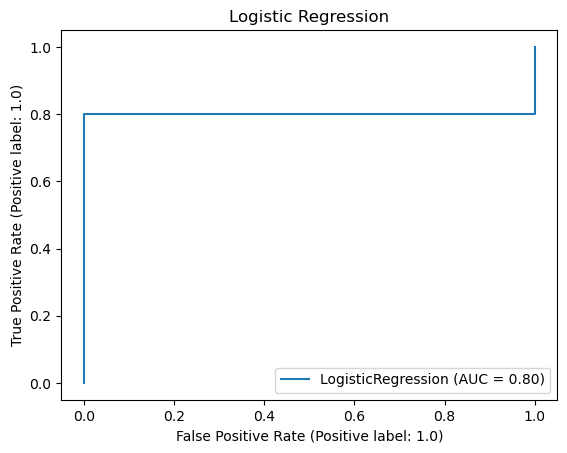

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


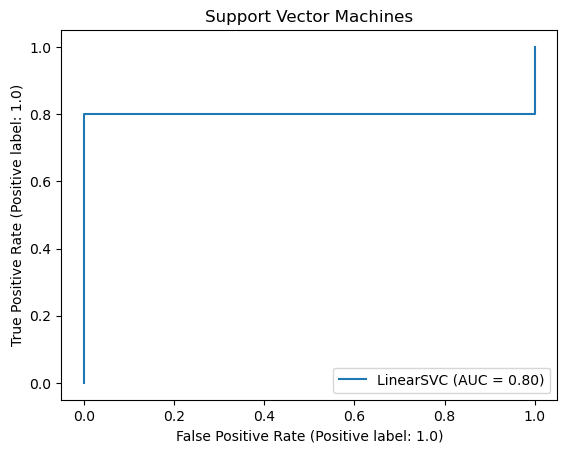

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


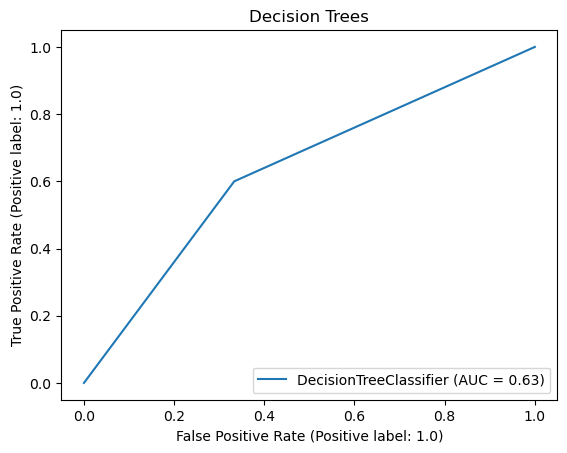

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


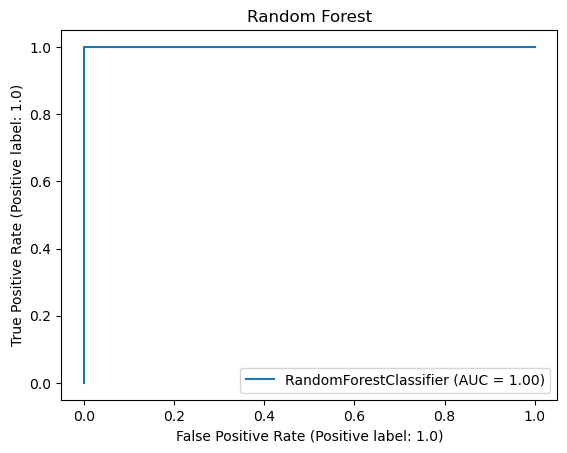

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


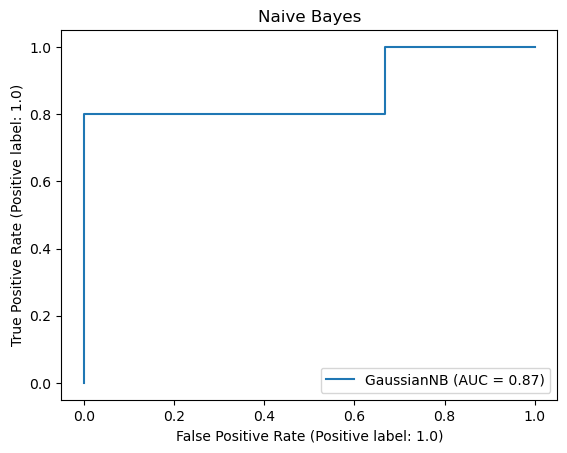

C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kuba8\miniconda3\envs\julab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


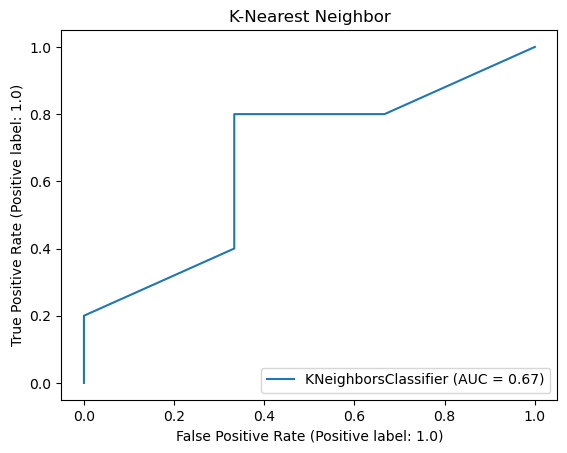

In [12]:
#make classificarion and plot ROC curves
accuracy, precision, recall, f1_measure = {}, {}, {}, {}

X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0)
con_mat=pd.DataFrame([])
for key in models.keys():
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1_measure[key] = f1_score(predictions, y_test)
    con_mat[key]=predictions
    sk.metrics.plot_roc_curve(models[key], X_test, y_test)
    plt.title(key)
    plt.show()
    X=np.array(x)

    #plot_decision_boundary(models[key])
    
################################################################################UP########################################################    

In [13]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1_measure'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1_measure'] = f1_measure.values()

df_model

,Accuracy,Precision,Recall,F1_measure
Logistic Regression,0.875,0.8,1.000,0.888889
Support Vector Machines,0.625,1.0,0.625,0.769231
Decision Trees,0.625,0.6,0.750,0.666667
Random Forest,0.750,0.6,1.000,0.750000
Naive Bayes,0.750,0.6,1.000,0.750000
K-Nearest Neighbor,0.625,0.6,0.750,0.666667


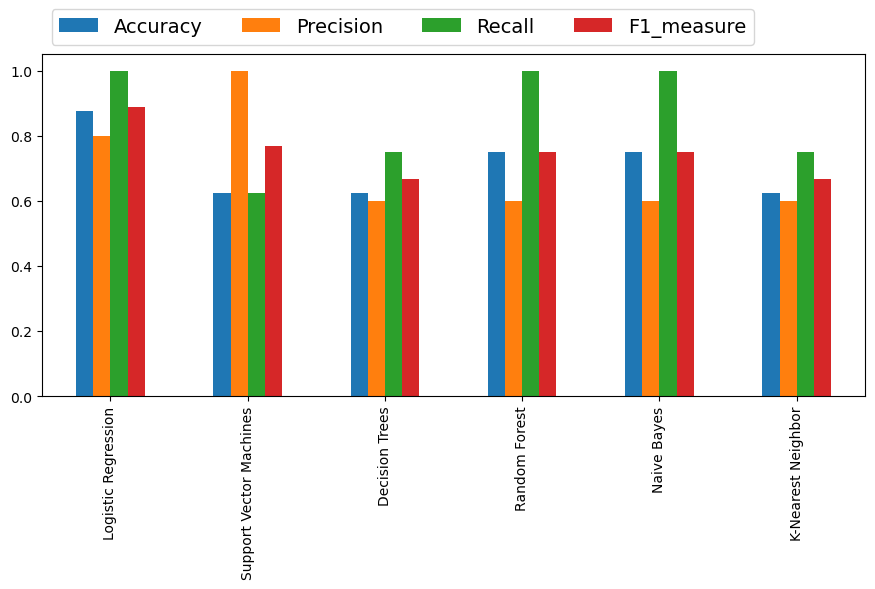

In [14]:
ax = df_model.plot.bar(figsize=(9,6))
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

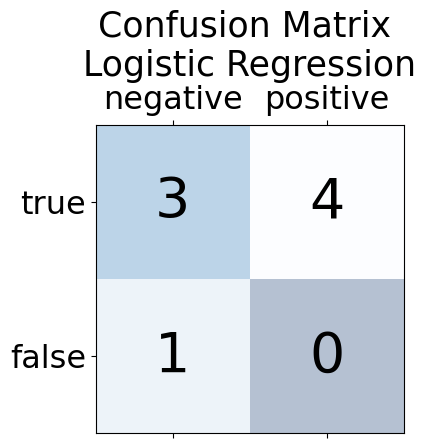

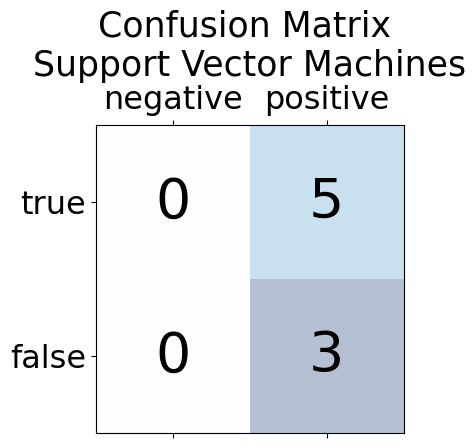

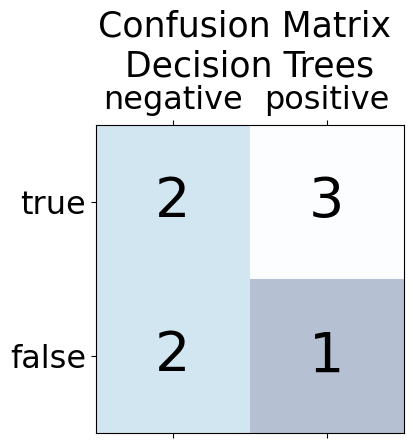

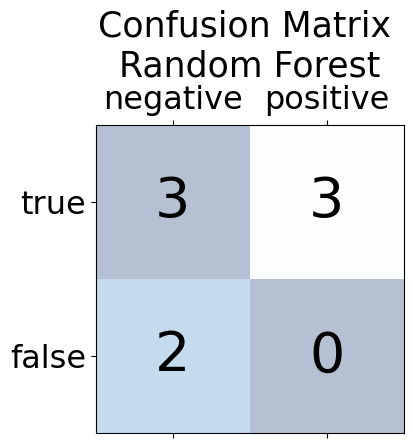

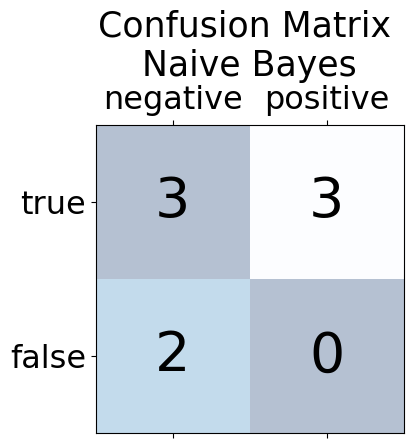

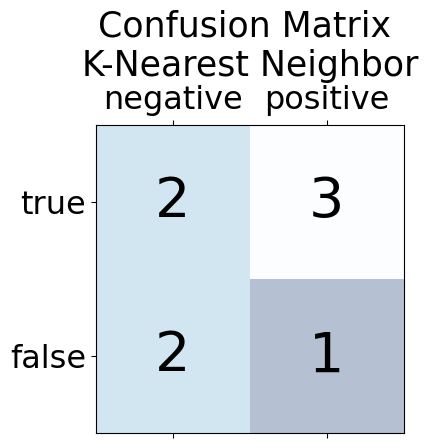

In [15]:
#plot confusion matrix
for key in models.keys():
    TN, FP, FN, TP = confusion_matrix(y_test, con_mat[key]).ravel()
    #print('model '+ key)
    #print('True Positive(TP)  = ', TP)
    #print('False Positive(FP) = ', FP)
    #print('True Negative(TN)  = ', TN)
    #print('False Negative(FN) = ', FN)
    #print('---------------------------')
    conf_matrix=confusion_matrix(y_test, con_mat[key])
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    
    ax.text(x=0, y=0, s=conf_matrix[0, 0], va='center', ha='center', size=40)
    ax.text(x=0, y=1, s=conf_matrix[1, 0], va='center', ha='center', size=40)
    ax.text(x=1, y=0, s=conf_matrix[1, 1], va='center', ha='center', size=40)
    ax.text(x=1, y=1, s=conf_matrix[0, 1], va='center', ha='center', size=40)
    
    plt.title('Confusion Matrix \n'+ key, fontsize=25)
    plt.xticks([0,1],['negative','positive'],fontsize=23)
    plt.yticks([0,1],['true','false'],fontsize=23)
    plt.show()

In [16]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.4, random_state=0)
model.fit(X_train, y_train)

df=np.array([])
i=0
for priznak1 in np.arange(81,88,1):
    for priznak2 in np.arange(0,1e-5,1e-6):
        for priznak3 in np.arange(0,1e-5,1e-6):
            x_in=np.array([priznak1,priznak2,priznak3])
            y_pred = model.predict([x_in])
            df=np.append(df,values=[priznak1,priznak2,priznak3,y_pred[0]])
            i=i+1
a=df.reshape(i,4)

In [17]:
df=pd.DataFrame(a)
dataset

,value,label,point_index,status
0,8.249572e+01,ZM001_b_data,0,Z
1,8.249572e+01,ZM001_b_data,0,Z
2,8.209846e+01,ZM002_b_data,0,Z
3,8.155019e+01,ZM003_b_data,0,Z
4,8.246646e+01,ZM004_b_data,0,Z
...,...,...,...,...
115,4.819810e-07,SF045_bar_data,2,S
116,3.767410e-07,SF046_bar_data,2,S
117,2.016140e-06,SM047_bar_data,2,S
118,1.387130e-06,SM048_bar_data,2,S


In [18]:
dataset.query("point_index == 0")['value'].to_numpy()

array([82.49571729, 82.49571729, 82.09846204, 81.55019223, 82.46645781,
       82.43723636, 87.6631693 , 87.45170319, 86.04112708, 85.70937789,
       85.98475278, 85.29798782, 86.52779169, 87.14009439, 86.95161826,
       86.98665626, 86.98392796, 86.84768059, 87.30667188, 87.01945663,
       86.63654437, 81.53369316, 82.5966378 , 84.15923907, 85.03063374,
       83.5381054 , 79.51888881, 83.51993729, 83.9924766 , 85.95991251,
       85.60796926, 85.84202558, 84.94395507, 86.00024495, 85.09951975,
       84.27087324, 83.34698501, 86.48299174, 86.31747667, 84.9463335 ])

<AxesSubplot: xlabel='0', ylabel='1'>

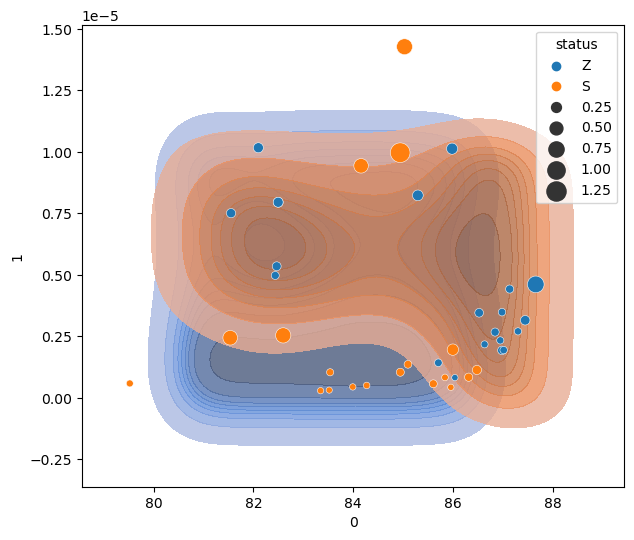

In [19]:
import seaborn as sns
xx=0
yy=1
f, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(data=df, x=df[xx], y=df[yy], hue=df[3], fill=True, palette="deep",alpha=0.8,legend=True)
sns.scatterplot(x=np.array(dataset.query("point_index == @xx")['value']), y=np.array(dataset.query("point_index == @yy")['value']), hue=dataset.query("point_index == 0")['status'], size=dataset.query("point_index == 2")['value'].to_numpy(),sizes=(20, 200))